In [1]:
import numpy as np
import matplotlib.pyplot as plt

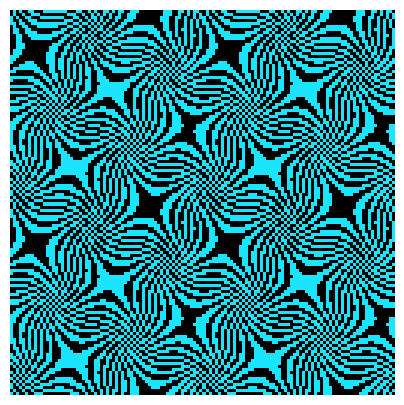

In [2]:
def hash_fn(x: np.ndarray, y: np.ndarray,
            c_x: float, c_y: float, c_xy: float, c_xx: float, c_yy: float,
            m: float, threshold: float) -> bool:
    return np.mod(
      (c_x * x + c_y * y + c_xy * x*y + c_xx * x*x + c_yy * y*y),
      m) < threshold * m

size = 128
x = np.arange(size)[None].astype(np.float64)
y = np.arange(size)[:, None].astype(np.float64)

c0 = np.array([0.0, 0.0, 0.0])
c1 = np.array([0.1, 0.9, 1.0])

# pattern = dict(c_x=0, c_y=1699, c_xy=2803, c_xx=1, c_yy=4129, m=64)
# pattern = dict(c_x=1, c_y=1, c_xy=0, c_xx=1, c_yy=1, m=64)
pattern = dict(c_x=35, c_y=51, c_xy=1, c_xx=1, c_yy=31, m=64)

threshold = 0.5

h = hash_fn(x, y, **pattern, threshold=threshold)

_, ax = plt.subplots(figsize=(5, 5))
c = c0 * h[:, :, None] + c1 * ~h[:, :, None]
ax.imshow(c, cmap='gray')
ax.axis("off");